In [1]:
import pandas as pd
from openpyxl import load_workbook
import numpy as np
from IPython.display import Image
from sklearn.impute import SimpleImputer
from sklearn import tree
from subprocess import check_call
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report

In [2]:
df = pd.read_csv(r'Dataset\siswa.csv')
df

,No,no Induk,Nama,jen kel,alamat,Agama,Tgl Lahir,Tmpt Lahir,Nama_Wali,Pekerjaan Wali,Pend,alamat wali,Thn msk,usia msk,lulus,UAS,predikat,pend sebelumSD
0,1,2683,Ani Yuanita,P,Tegallayang,Islam,11/3/1993,Bantul,Sukarjo,Petani,SD,Tegallayang,2000,7,2007,"17,9",Cukup,TK
1,2,2686,Burhan Fajar P.,L,Tegallayang,Islam,29/12/1993,Bantul,Hadi Wardoyo,Petani,SMA,Tegallayang,2000,7,2007,"16,9",Cukup,TK
2,3,2688,Heri Budiyanto,L,Tegallayang,Islam,2/15/1994,Bantul,Ribut,Petani,NaN,Tegallayang,2000,6,2007,"20,15",Cukup,TK
3,4,2700,Dimas Satrio W.,L,Tegallayang,Islam,4/20/1994,Bantul,FX Slamet Sudarsono,PNS,PT,Tegallayang,2001,7,2007,"18,35",Cukup,TK
4,5,2701,Nur Hidayat,L,Tegallayang,Islam,6/12/1994,Kuningan,Ofan,Wiraswasta,SLTP,Tegallayang,2001,7,2007,"26,1",Baik,TK
5,6,2702,Vilda Lestari,P,Tegallayang,Islam,6/25/1994,Bantul,Rochmadi,Petani,SLTP,Tegallayang,2001,7,2007,"13,6",Kurang,TK
6,7,2703,Edi Suryanto,L,Tegallayang,Islam,7/6/1994,Bantul,Sukiman,Petani,SD,Tegallayang,2001,7,2007,"22,65",Baik,TK
7,8,2705,Erna Dwi Puspita,P,Tegallayang,Islam,9/12/1994,Bantul,Sumarjo,Wiraswasta,SD,Tegallayang,2001,7,2007,"18,05",Cukup,TK
8,9,2706,Nurfita FF,P,Daguran,Islam,4/10/1994,Bantul,Giyana,Wiraswasta,SD,Tegallayang,2001,7,2007,"16,15",Cukup,TK
9,10,2707,Fahmi dwi N.,L,Tegallayang,Islam,5/10/1994,Bantul,Syamsudin,Petani,SD,Tegallayang,2001,7,2007,"26,9",Baik,TK


In [3]:
df.columns = ['No','No_Induk','Nama','JK','Alamat','Agama','TL','TempatL','Nama_Wali','Pekerjaan_Wali','Pend','Alamat_Wali','Thn_Msk','Usia_Msk','Lulus','UAS','Predikat','Pend_Sebelum']
df

,No,No_Induk,Nama,JK,Alamat,Agama,TL,TempatL,Nama_Wali,Pekerjaan_Wali,Pend,Alamat_Wali,Thn_Msk,Usia_Msk,Lulus,UAS,Predikat,Pend_Sebelum
0,1,2683,Ani Yuanita,P,Tegallayang,Islam,11/3/1993,Bantul,Sukarjo,Petani,SD,Tegallayang,2000,7,2007,"17,9",Cukup,TK
1,2,2686,Burhan Fajar P.,L,Tegallayang,Islam,29/12/1993,Bantul,Hadi Wardoyo,Petani,SMA,Tegallayang,2000,7,2007,"16,9",Cukup,TK
2,3,2688,Heri Budiyanto,L,Tegallayang,Islam,2/15/1994,Bantul,Ribut,Petani,NaN,Tegallayang,2000,6,2007,"20,15",Cukup,TK
3,4,2700,Dimas Satrio W.,L,Tegallayang,Islam,4/20/1994,Bantul,FX Slamet Sudarsono,PNS,PT,Tegallayang,2001,7,2007,"18,35",Cukup,TK
4,5,2701,Nur Hidayat,L,Tegallayang,Islam,6/12/1994,Kuningan,Ofan,Wiraswasta,SLTP,Tegallayang,2001,7,2007,"26,1",Baik,TK
5,6,2702,Vilda Lestari,P,Tegallayang,Islam,6/25/1994,Bantul,Rochmadi,Petani,SLTP,Tegallayang,2001,7,2007,"13,6",Kurang,TK
6,7,2703,Edi Suryanto,L,Tegallayang,Islam,7/6/1994,Bantul,Sukiman,Petani,SD,Tegallayang,2001,7,2007,"22,65",Baik,TK
7,8,2705,Erna Dwi Puspita,P,Tegallayang,Islam,9/12/1994,Bantul,Sumarjo,Wiraswasta,SD,Tegallayang,2001,7,2007,"18,05",Cukup,TK
8,9,2706,Nurfita FF,P,Daguran,Islam,4/10/1994,Bantul,Giyana,Wiraswasta,SD,Tegallayang,2001,7,2007,"16,15",Cukup,TK
9,10,2707,Fahmi dwi N.,L,Tegallayang,Islam,5/10/1994,Bantul,Syamsudin,Petani,SD,Tegallayang,2001,7,2007,"26,9",Baik,TK


In [4]:
for index, row in df.iterrows():
    df.loc[index, 'Tahun Lahir'] = row['TL'][-4:]
df

,No,No_Induk,Nama,JK,Alamat,Agama,TL,TempatL,Nama_Wali,Pekerjaan_Wali,Pend,Alamat_Wali,Thn_Msk,Usia_Msk,Lulus,UAS,Predikat,Pend_Sebelum,Tahun Lahir
0,1,2683,Ani Yuanita,P,Tegallayang,Islam,11/3/1993,Bantul,Sukarjo,Petani,SD,Tegallayang,2000,7,2007,"17,9",Cukup,TK,1993
1,2,2686,Burhan Fajar P.,L,Tegallayang,Islam,29/12/1993,Bantul,Hadi Wardoyo,Petani,SMA,Tegallayang,2000,7,2007,"16,9",Cukup,TK,1993
2,3,2688,Heri Budiyanto,L,Tegallayang,Islam,2/15/1994,Bantul,Ribut,Petani,NaN,Tegallayang,2000,6,2007,"20,15",Cukup,TK,1994
3,4,2700,Dimas Satrio W.,L,Tegallayang,Islam,4/20/1994,Bantul,FX Slamet Sudarsono,PNS,PT,Tegallayang,2001,7,2007,"18,35",Cukup,TK,1994
4,5,2701,Nur Hidayat,L,Tegallayang,Islam,6/12/1994,Kuningan,Ofan,Wiraswasta,SLTP,Tegallayang,2001,7,2007,"26,1",Baik,TK,1994
5,6,2702,Vilda Lestari,P,Tegallayang,Islam,6/25/1994,Bantul,Rochmadi,Petani,SLTP,Tegallayang,2001,7,2007,"13,6",Kurang,TK,1994
6,7,2703,Edi Suryanto,L,Tegallayang,Islam,7/6/1994,Bantul,Sukiman,Petani,SD,Tegallayang,2001,7,2007,"22,65",Baik,TK,1994
7,8,2705,Erna Dwi Puspita,P,Tegallayang,Islam,9/12/1994,Bantul,Sumarjo,Wiraswasta,SD,Tegallayang,2001,7,2007,"18,05",Cukup,TK,1994
8,9,2706,Nurfita FF,P,Daguran,Islam,4/10/1994,Bantul,Giyana,Wiraswasta,SD,Tegallayang,2001,7,2007,"16,15",Cukup,TK,1994
9,10,2707,Fahmi dwi N.,L,Tegallayang,Islam,5/10/1994,Bantul,Syamsudin,Petani,SD,Tegallayang,2001,7,2007,"26,9",Baik,TK,1994


In [5]:
from datetime import datetime
now = datetime.now()

now.year
for index, row in df.iterrows():
    df.loc[index, 'Umur']=now.year - int(row['Tahun Lahir'])
df

,No,No_Induk,Nama,JK,Alamat,Agama,TL,TempatL,Nama_Wali,Pekerjaan_Wali,Pend,Alamat_Wali,Thn_Msk,Usia_Msk,Lulus,UAS,Predikat,Pend_Sebelum,Tahun Lahir,Umur
0,1,2683,Ani Yuanita,P,Tegallayang,Islam,11/3/1993,Bantul,Sukarjo,Petani,SD,Tegallayang,2000,7,2007,"17,9",Cukup,TK,1993,29.0
1,2,2686,Burhan Fajar P.,L,Tegallayang,Islam,29/12/1993,Bantul,Hadi Wardoyo,Petani,SMA,Tegallayang,2000,7,2007,"16,9",Cukup,TK,1993,29.0
2,3,2688,Heri Budiyanto,L,Tegallayang,Islam,2/15/1994,Bantul,Ribut,Petani,NaN,Tegallayang,2000,6,2007,"20,15",Cukup,TK,1994,28.0
3,4,2700,Dimas Satrio W.,L,Tegallayang,Islam,4/20/1994,Bantul,FX Slamet Sudarsono,PNS,PT,Tegallayang,2001,7,2007,"18,35",Cukup,TK,1994,28.0
4,5,2701,Nur Hidayat,L,Tegallayang,Islam,6/12/1994,Kuningan,Ofan,Wiraswasta,SLTP,Tegallayang,2001,7,2007,"26,1",Baik,TK,1994,28.0
5,6,2702,Vilda Lestari,P,Tegallayang,Islam,6/25/1994,Bantul,Rochmadi,Petani,SLTP,Tegallayang,2001,7,2007,"13,6",Kurang,TK,1994,28.0
6,7,2703,Edi Suryanto,L,Tegallayang,Islam,7/6/1994,Bantul,Sukiman,Petani,SD,Tegallayang,2001,7,2007,"22,65",Baik,TK,1994,28.0
7,8,2705,Erna Dwi Puspita,P,Tegallayang,Islam,9/12/1994,Bantul,Sumarjo,Wiraswasta,SD,Tegallayang,2001,7,2007,"18,05",Cukup,TK,1994,28.0
8,9,2706,Nurfita FF,P,Daguran,Islam,4/10/1994,Bantul,Giyana,Wiraswasta,SD,Tegallayang,2001,7,2007,"16,15",Cukup,TK,1994,28.0
9,10,2707,Fahmi dwi N.,L,Tegallayang,Islam,5/10/1994,Bantul,Syamsudin,Petani,SD,Tegallayang,2001,7,2007,"26,9",Baik,TK,1994,28.0


In [6]:
for index, row in df.iterrows():
    df.loc[index, 'Masa Studi']=row['Lulus']-row['Thn_Msk']
df

,No,No_Induk,Nama,JK,Alamat,Agama,TL,TempatL,Nama_Wali,Pekerjaan_Wali,...,Alamat_Wali,Thn_Msk,Usia_Msk,Lulus,UAS,Predikat,Pend_Sebelum,Tahun Lahir,Umur,Masa Studi
0,1,2683,Ani Yuanita,P,Tegallayang,Islam,11/3/1993,Bantul,Sukarjo,Petani,...,Tegallayang,2000,7,2007,"17,9",Cukup,TK,1993,29.0,7.0
1,2,2686,Burhan Fajar P.,L,Tegallayang,Islam,29/12/1993,Bantul,Hadi Wardoyo,Petani,...,Tegallayang,2000,7,2007,"16,9",Cukup,TK,1993,29.0,7.0
2,3,2688,Heri Budiyanto,L,Tegallayang,Islam,2/15/1994,Bantul,Ribut,Petani,...,Tegallayang,2000,6,2007,"20,15",Cukup,TK,1994,28.0,7.0
3,4,2700,Dimas Satrio W.,L,Tegallayang,Islam,4/20/1994,Bantul,FX Slamet Sudarsono,PNS,...,Tegallayang,2001,7,2007,"18,35",Cukup,TK,1994,28.0,6.0
4,5,2701,Nur Hidayat,L,Tegallayang,Islam,6/12/1994,Kuningan,Ofan,Wiraswasta,...,Tegallayang,2001,7,2007,"26,1",Baik,TK,1994,28.0,6.0
5,6,2702,Vilda Lestari,P,Tegallayang,Islam,6/25/1994,Bantul,Rochmadi,Petani,...,Tegallayang,2001,7,2007,"13,6",Kurang,TK,1994,28.0,6.0
6,7,2703,Edi Suryanto,L,Tegallayang,Islam,7/6/1994,Bantul,Sukiman,Petani,...,Tegallayang,2001,7,2007,"22,65",Baik,TK,1994,28.0,6.0
7,8,2705,Erna Dwi Puspita,P,Tegallayang,Islam,9/12/1994,Bantul,Sumarjo,Wiraswasta,...,Tegallayang,2001,7,2007,"18,05",Cukup,TK,1994,28.0,6.0
8,9,2706,Nurfita FF,P,Daguran,Islam,4/10/1994,Bantul,Giyana,Wiraswasta,...,Tegallayang,2001,7,2007,"16,15",Cukup,TK,1994,28.0,6.0
9,10,2707,Fahmi dwi N.,L,Tegallayang,Islam,5/10/1994,Bantul,Syamsudin,Petani,...,Tegallayang,2001,7,2007,"26,9",Baik,TK,1994,28.0,6.0


In [7]:
# merubah data float menjadi integer
df['UAS'] = df['UAS'].apply(str)
df['UAS'] = df['UAS'].str.replace(',','.').apply(float)
df

,No,No_Induk,Nama,JK,Alamat,Agama,TL,TempatL,Nama_Wali,Pekerjaan_Wali,...,Alamat_Wali,Thn_Msk,Usia_Msk,Lulus,UAS,Predikat,Pend_Sebelum,Tahun Lahir,Umur,Masa Studi
0,1,2683,Ani Yuanita,P,Tegallayang,Islam,11/3/1993,Bantul,Sukarjo,Petani,...,Tegallayang,2000,7,2007,17.90,Cukup,TK,1993,29.0,7.0
1,2,2686,Burhan Fajar P.,L,Tegallayang,Islam,29/12/1993,Bantul,Hadi Wardoyo,Petani,...,Tegallayang,2000,7,2007,16.90,Cukup,TK,1993,29.0,7.0
2,3,2688,Heri Budiyanto,L,Tegallayang,Islam,2/15/1994,Bantul,Ribut,Petani,...,Tegallayang,2000,6,2007,20.15,Cukup,TK,1994,28.0,7.0
3,4,2700,Dimas Satrio W.,L,Tegallayang,Islam,4/20/1994,Bantul,FX Slamet Sudarsono,PNS,...,Tegallayang,2001,7,2007,18.35,Cukup,TK,1994,28.0,6.0
4,5,2701,Nur Hidayat,L,Tegallayang,Islam,6/12/1994,Kuningan,Ofan,Wiraswasta,...,Tegallayang,2001,7,2007,26.10,Baik,TK,1994,28.0,6.0
5,6,2702,Vilda Lestari,P,Tegallayang,Islam,6/25/1994,Bantul,Rochmadi,Petani,...,Tegallayang,2001,7,2007,13.60,Kurang,TK,1994,28.0,6.0
6,7,2703,Edi Suryanto,L,Tegallayang,Islam,7/6/1994,Bantul,Sukiman,Petani,...,Tegallayang,2001,7,2007,22.65,Baik,TK,1994,28.0,6.0
7,8,2705,Erna Dwi Puspita,P,Tegallayang,Islam,9/12/1994,Bantul,Sumarjo,Wiraswasta,...,Tegallayang,2001,7,2007,18.05,Cukup,TK,1994,28.0,6.0
8,9,2706,Nurfita FF,P,Daguran,Islam,4/10/1994,Bantul,Giyana,Wiraswasta,...,Tegallayang,2001,7,2007,16.15,Cukup,TK,1994,28.0,6.0
9,10,2707,Fahmi dwi N.,L,Tegallayang,Islam,5/10/1994,Bantul,Syamsudin,Petani,...,Tegallayang,2001,7,2007,26.90,Baik,TK,1994,28.0,6.0


In [8]:
d_train = df[['No_Induk','Umur','UAS','Masa Studi','Usia_Msk','Thn_Msk','Lulus']].reset_index(drop=True)
d_train

,No_Induk,Umur,UAS,Masa Studi,Usia_Msk,Thn_Msk,Lulus
0,2683,29.0,17.90,7.0,7,2000,2007
1,2686,29.0,16.90,7.0,7,2000,2007
2,2688,28.0,20.15,7.0,6,2000,2007
3,2700,28.0,18.35,6.0,7,2001,2007
4,2701,28.0,26.10,6.0,7,2001,2007
5,2702,28.0,13.60,6.0,7,2001,2007
6,2703,28.0,22.65,6.0,7,2001,2007
7,2705,28.0,18.05,6.0,7,2001,2007
8,2706,28.0,16.15,6.0,7,2001,2007
9,2707,28.0,26.90,6.0,7,2001,2007


In [9]:
for index, row in d_train.iterrows():
    if row['UAS'] >= 21:
        d_train.loc[index, 'Predikat'] = 'Baik'
    elif row['UAS'] >= 16:
        d_train.loc[index, 'Predikat'] = 'Cukup'
    else :
        d_train.loc[index, 'Predikat'] = 'Kurang'
d_train

,No_Induk,Umur,UAS,Masa Studi,Usia_Msk,Thn_Msk,Lulus,Predikat
0,2683,29.0,17.90,7.0,7,2000,2007,Cukup
1,2686,29.0,16.90,7.0,7,2000,2007,Cukup
2,2688,28.0,20.15,7.0,6,2000,2007,Cukup
3,2700,28.0,18.35,6.0,7,2001,2007,Cukup
4,2701,28.0,26.10,6.0,7,2001,2007,Baik
5,2702,28.0,13.60,6.0,7,2001,2007,Kurang
6,2703,28.0,22.65,6.0,7,2001,2007,Baik
7,2705,28.0,18.05,6.0,7,2001,2007,Cukup
8,2706,28.0,16.15,6.0,7,2001,2007,Cukup
9,2707,28.0,26.90,6.0,7,2001,2007,Baik


In [10]:
y = d_train['Predikat'].values
y

array(['Cukup', 'Cukup', 'Cukup', 'Cukup', 'Baik', 'Kurang', 'Baik',
       'Cukup', 'Cukup', 'Baik', 'Cukup', 'Baik', 'Baik', 'Baik', 'Baik',
       'Baik', 'Baik', 'Baik', 'Baik', 'Baik', 'Baik', 'Cukup', 'Cukup',
       'Cukup', 'Cukup', 'Baik', 'Cukup', 'Baik', 'Baik'], dtype=object)

In [11]:
columns = ['UAS','Usia_Msk','Masa Studi','Umur']
features = d_train[list(columns)].values
features

array([[17.9 ,  7.  ,  7.  , 29.  ],
       [16.9 ,  7.  ,  7.  , 29.  ],
       [20.15,  6.  ,  7.  , 28.  ],
       [18.35,  7.  ,  6.  , 28.  ],
       [26.1 ,  7.  ,  6.  , 28.  ],
       [13.6 ,  7.  ,  6.  , 28.  ],
       [22.65,  7.  ,  6.  , 28.  ],
       [18.05,  7.  ,  6.  , 28.  ],
       [16.15,  7.  ,  6.  , 28.  ],
       [26.9 ,  7.  ,  6.  , 28.  ],
       [20.95,  7.  ,  6.  , 28.  ],
       [25.25,  7.  ,  6.  , 28.  ],
       [25.45,  7.  ,  6.  , 28.  ],
       [28.85,  7.  ,  6.  , 28.  ],
       [25.4 ,  6.  ,  6.  , 27.  ],
       [25.1 ,  6.  ,  6.  , 27.  ],
       [24.2 ,  6.  ,  6.  , 27.  ],
       [26.6 ,  6.  ,  6.  , 27.  ],
       [27.15,  6.  ,  6.  , 27.  ],
       [26.5 ,  6.  ,  6.  , 27.  ],
       [24.6 ,  6.  ,  6.  , 27.  ],
       [20.5 ,  6.  ,  6.  , 27.  ],
       [18.45,  6.  ,  6.  , 27.  ],
       [18.3 ,  7.  ,  8.  , 29.  ],
       [16.45,  7.  ,  7.  , 28.  ],
       [23.2 ,  6.  ,  7.  , 27.  ],
       [18.75,  6.  ,  7.  , 27.  ],
 

In [12]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x = imputer.fit_transform(features)
x

array([[17.9 ,  7.  ,  7.  , 29.  ],
       [16.9 ,  7.  ,  7.  , 29.  ],
       [20.15,  6.  ,  7.  , 28.  ],
       [18.35,  7.  ,  6.  , 28.  ],
       [26.1 ,  7.  ,  6.  , 28.  ],
       [13.6 ,  7.  ,  6.  , 28.  ],
       [22.65,  7.  ,  6.  , 28.  ],
       [18.05,  7.  ,  6.  , 28.  ],
       [16.15,  7.  ,  6.  , 28.  ],
       [26.9 ,  7.  ,  6.  , 28.  ],
       [20.95,  7.  ,  6.  , 28.  ],
       [25.25,  7.  ,  6.  , 28.  ],
       [25.45,  7.  ,  6.  , 28.  ],
       [28.85,  7.  ,  6.  , 28.  ],
       [25.4 ,  6.  ,  6.  , 27.  ],
       [25.1 ,  6.  ,  6.  , 27.  ],
       [24.2 ,  6.  ,  6.  , 27.  ],
       [26.6 ,  6.  ,  6.  , 27.  ],
       [27.15,  6.  ,  6.  , 27.  ],
       [26.5 ,  6.  ,  6.  , 27.  ],
       [24.6 ,  6.  ,  6.  , 27.  ],
       [20.5 ,  6.  ,  6.  , 27.  ],
       [18.45,  6.  ,  6.  , 27.  ],
       [18.3 ,  7.  ,  8.  , 29.  ],
       [16.45,  7.  ,  7.  , 28.  ],
       [23.2 ,  6.  ,  7.  , 27.  ],
       [18.75,  6.  ,  7.  , 27.  ],
 

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [14]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(x_train,y_train)
predict = clf.predict(x_test)

In [15]:
with open("Graph_tree.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f, feature_names=columns,
                            filled=True, rounded=True,
                            special_characters=True)

In [16]:
from graphviz import render
render('dot', 'png', 'Graph_tree.dot')

'Graph_tree.dot.png'

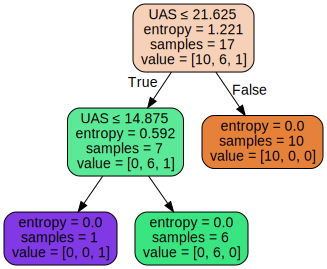

In [17]:
from graphviz import Source
Source.from_file("Graph_tree.dot")

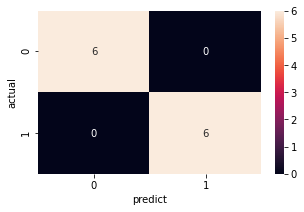

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".0f", ax=ax)
plt.xlabel("predict")
plt.ylabel("actual")
plt.show()

In [19]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

        Baik       1.00      1.00      1.00         6
       Cukup       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [20]:
accuracy_score(y_test, predict)

1.0